In [2]:
import torch
from torchdiffeq import odeint
T = 1
true_x0 = torch.tensor([0.]).repeat(1000, 1)
t = torch.linspace(0., T, 100)
target_x = torch.tensor([-1]).unsqueeze(0)

In [19]:
class WideNNEnsemble(torch.nn.Module):
    def __init__(self, max_active_neurons=1000):
        super().__init__()
        a=torch.tril(torch.randn(max_active_neurons, max_active_neurons))/10000
        self.w = torch.nn.Parameter(a)
        self.w.requires_grad = True
        
    def forward(self, t, x):
        u = torch.einsum('ij, jk->ik', self.w*torch.tril(torch.ones_like(self.w)), torch.as_tensor(t).repeat(1000, 1))
        dx = u
        return dx

wnn = WideNNEnsemble()
opt = torch.optim.Adam(wnn.parameters(), lr=0.0001)

In [20]:
wnn.w

Parameter containing:
tensor([[-7.3648e-05,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00],
        [-1.3384e-05, -1.2076e-04,  0.0000e+00,  ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00],
        [-4.8853e-05, -8.6973e-06, -1.7790e-04,  ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00],
        ...,
        [ 5.6158e-05, -1.0723e-04,  1.3997e-04,  ..., -1.0272e-04,
          0.0000e+00,  0.0000e+00],
        [ 3.4837e-05, -1.8860e-05,  8.3323e-05,  ..., -1.2747e-04,
         -6.3984e-05,  0.0000e+00],
        [ 7.9494e-05, -4.7338e-05, -6.0088e-05,  ..., -4.8992e-06,
          6.1222e-06, -5.4488e-05]], requires_grad=True)

In [98]:
for i in range(1000):
    opt.zero_grad()
    x = odeint(wnn, true_x0, t)
    loss = ((x[-1, :, :] - target_x)**2).mean()
    loss.backward()
    opt.step()
print(loss)


tensor(0.0035, grad_fn=<MeanBackward0>)


In [99]:
wnn.w

Parameter containing:
tensor([[-0.1961,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [-0.1919, -0.1920,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [-0.1875, -0.1875, -0.1877,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [-0.0019, -0.0021, -0.0019,  ..., -0.0021,  0.0000,  0.0000],
        [-0.0020, -0.0020, -0.0019,  ..., -0.0021, -0.0021,  0.0000],
        [-0.0019, -0.0020, -0.0021,  ..., -0.0020, -0.0020, -0.0021]],
       requires_grad=True)

In [100]:
with torch.no_grad():
    x = odeint(wnn, true_x0, t)
    loss = ((x[-1, :, :] - target_x)**2)
loss

tensor([[8.1349e-01],
        [6.5295e-01],
        [5.1649e-01],
        [4.0232e-01],
        [3.0807e-01],
        [2.3146e-01],
        [1.7107e-01],
        [1.2339e-01],
        [8.7273e-02],
        [6.0473e-02],
        [4.0813e-02],
        [2.7006e-02],
        [1.7396e-02],
        [1.0980e-02],
        [6.7783e-03],
        [4.0662e-03],
        [2.3906e-03],
        [1.3776e-03],
        [7.7452e-04],
        [4.2891e-04],
        [2.3015e-04],
        [1.2167e-04],
        [6.3431e-05],
        [3.2012e-05],
        [1.5966e-05],
        [7.8193e-06],
        [3.7233e-06],
        [1.7402e-06],
        [8.0000e-07],
        [3.5898e-07],
        [1.5891e-07],
        [6.9439e-08],
        [2.9284e-08],
        [1.2304e-08],
        [5.0310e-09],
        [1.9931e-09],
        [7.9485e-10],
        [2.9673e-10],
        [1.0880e-10],
        [4.8633e-11],
        [1.2790e-11],
        [7.8479e-12],
        [8.5301e-12],
        [8.8818e-12],
        [8.8818e-12],
        [8

In [101]:
wnn.w[-1]

tensor([-0.0019, -0.0020, -0.0021, -0.0019, -0.0020, -0.0020, -0.0021, -0.0020,
        -0.0019, -0.0019, -0.0018, -0.0021, -0.0021, -0.0020, -0.0020, -0.0020,
        -0.0018, -0.0021, -0.0019, -0.0021, -0.0020, -0.0021, -0.0019, -0.0021,
        -0.0020, -0.0020, -0.0021, -0.0021, -0.0020, -0.0020, -0.0021, -0.0020,
        -0.0020, -0.0019, -0.0019, -0.0021, -0.0021, -0.0021, -0.0021, -0.0019,
        -0.0021, -0.0020, -0.0019, -0.0018, -0.0022, -0.0019, -0.0021, -0.0020,
        -0.0019, -0.0020, -0.0022, -0.0020, -0.0021, -0.0022, -0.0019, -0.0020,
        -0.0020, -0.0019, -0.0021, -0.0019, -0.0019, -0.0019, -0.0019, -0.0019,
        -0.0018, -0.0020, -0.0018, -0.0019, -0.0019, -0.0020, -0.0020, -0.0019,
        -0.0021, -0.0022, -0.0019, -0.0021, -0.0021, -0.0020, -0.0019, -0.0020,
        -0.0022, -0.0020, -0.0019, -0.0019, -0.0018, -0.0021, -0.0021, -0.0020,
        -0.0019, -0.0022, -0.0020, -0.0021, -0.0019, -0.0021, -0.0020, -0.0021,
        -0.0020, -0.0018, -0.0018, -0.00

In [109]:
u = (wnn.w[-975].unsqueeze(1)@t.unsqueeze(0)).sum(0)

In [110]:
((u*0.01)**2).sum()

tensor(0.0133, grad_fn=<SumBackward0>)

In [111]:
((torch.ones_like(u)*0.01)**2).sum()

tensor(0.0100)

In [112]:
loss[-975]

tensor([7.8193e-06])

In [4]:
tensor_ = torch.tensor([[8.1349e-01],
        [6.5295e-01],
        [5.1649e-01],
        [4.0232e-01],
        [3.0807e-01],
        [2.3146e-01],
        [1.7107e-01],
        [1.2339e-01],
        [8.7273e-02],
        [6.0473e-02],
        [4.0813e-02],
        [2.7006e-02],
        [1.7396e-02],
        [1.0980e-02],
        [6.7783e-03],
        [4.0662e-03],
        [2.3906e-03],
        [1.3776e-03],
        [7.7452e-04],
        [4.2891e-04],
        [2.3015e-04],
        [1.2167e-04],
        [6.3431e-05],
        [3.2012e-05],
        [1.5966e-05],
        [7.8193e-06],
        [3.7233e-06],
        [1.7402e-06],
        [8.0000e-07],
        [3.5898e-07],
        [1.5891e-07],
        [6.9439e-08],
        [2.9284e-08],
        [1.2304e-08],
        [5.0310e-09],
        [1.9931e-09],
        [7.9485e-10],
        [2.9673e-10],
        [1.0880e-10],
        [4.8633e-11],
        [1.2790e-11],
        [7.8479e-12],
        [8.5301e-12],
        [8.8818e-12],
        [8.8818e-12],
        [8.5301e-12],
        [9.2406e-12],
        [8.5301e-12],
        [9.6065e-12],
        [8.8818e-12],
        [8.5301e-12],
        [8.8818e-12],
        [8.5301e-12],
        [8.8818e-12],
        [8.5301e-12],
        [7.8479e-12],
        [7.1942e-12],
        [6.2670e-12],
        [7.8479e-12],
        [7.1942e-12],
        [7.8479e-12],
        [7.1942e-12],
        [7.5175e-12],
        [1.4211e-12],
        [1.5667e-12],
        [1.4211e-12],
        [1.4211e-12],
        [1.1511e-12],
        [1.1511e-12],
        [1.5667e-12],
        [1.2825e-12],
        [1.1511e-12],
        [1.4211e-12],
        [9.0949e-13],
        [1.1511e-12],
        [9.0949e-13],
        [1.2825e-12],
        [9.0949e-13],
        [1.4211e-12],
        [9.0949e-13],
        [9.0949e-13],
        [6.9633e-13],
        [1.4211e-12],
        [1.2825e-12],
        [1.1511e-12],
        [9.0949e-13],
        [9.0949e-13],
        [9.0949e-13],
        [6.0041e-13],
        [1.0267e-12],
        [1.0267e-12],
        [1.4211e-12],
        [9.0949e-13],
        [6.9633e-13],
        [6.0041e-13],
        [7.9936e-13],
        [7.9936e-13],
        [9.0949e-13],
        [7.9936e-13],
        [7.9936e-13],
        [9.0949e-13],
        [6.9633e-13],
        [4.2988e-13],
        [6.9633e-13],
        [7.9936e-13],
        [7.9936e-13],
        [6.9633e-13],
        [1.0267e-12],
        [6.9633e-13],
        [4.2988e-13],
        [6.9633e-13],
        [6.0041e-13],
        [6.9633e-13],
        [7.9936e-13],
        [6.9633e-13],
        [6.9633e-13],
        [4.2988e-13],
        [7.9936e-13],
        [6.9633e-13],
        [5.1159e-13],
        [4.2988e-13],
        [5.1159e-13],
        [6.0041e-13],
        [4.2988e-13],
        [7.9936e-13],
        [5.1159e-13],
        [8.8818e-14],
        [8.8818e-14],
        [8.8818e-14],
        [1.4211e-14],
        [5.6843e-14],
        [8.8818e-14],
        [5.6843e-14],
        [8.8818e-14],
        [5.6843e-14],
        [1.4211e-14],
        [5.6843e-14],
        [8.8818e-14],
        [5.6843e-14],
        [5.6843e-14],
        [1.4211e-14],
        [5.6843e-14],
        [8.8818e-14],
        [8.8818e-14],
        [5.6843e-14],
        [1.4211e-14],
        [5.6843e-14],
        [8.8818e-14],
        [5.6843e-14],
        [1.2790e-13],
        [1.4211e-14],
        [1.2790e-13],
        [1.2790e-13],
        [5.6843e-14],
        [5.6843e-14],
        [5.6843e-14],
        [8.8818e-14],
        [5.6843e-14],
        [1.4211e-14],
        [3.1974e-14],
        [5.6843e-14],
        [5.6843e-14],
        [5.6843e-14],
        [1.4211e-14],
        [5.6843e-14],
        [8.8818e-14],
        [8.8818e-14],
        [8.8818e-14],
        [1.2790e-13],
        [1.4211e-14],
        [5.6843e-14],
        [8.8818e-14],
        [8.8818e-14],
        [8.8818e-14],
        [8.8818e-14],
        [5.6843e-14],
        [1.4211e-14],
        [3.5527e-15],
        [3.5527e-15],
        [0.0000e+00],
        [3.5527e-15],
        [1.4211e-14],
        [1.4211e-14],
        [1.4211e-14],
        [1.4211e-14],
        [1.4211e-14],
        [5.6843e-14],
        [1.4211e-14],
        [1.4211e-14],
        [5.6843e-14],
        [1.4211e-14],
        [3.5527e-15],
        [1.4211e-14],
        [5.6843e-14],
        [5.6843e-14],
        [5.6843e-14],
        [1.4211e-14],
        [1.4211e-14],
        [5.6843e-14],
        [5.6843e-14],
        [1.4211e-14],
        [5.6843e-14],
        [1.4211e-14],
        [5.6843e-14],
        [1.4211e-14],
        [1.4211e-14],
        [1.4211e-14],
        [1.4211e-14],
        [1.4211e-14],
        [1.4211e-14],
        [1.4211e-14],
        [1.4211e-14],
        [1.4211e-14],
        [0.0000e+00],
        [1.4211e-14],
        [1.4211e-14],
        [5.6843e-14],
        [1.4211e-14],
        [5.6843e-14],
        [1.4211e-14],
        [1.4211e-14],
        [1.4211e-14],
        [1.4211e-14],
        [1.4211e-14],
        [1.4211e-14],
        [1.4211e-14],
        [3.5527e-15],
        [0.0000e+00],
        [3.5527e-15],
        [3.5527e-15],
        [3.5527e-15],
        [1.4211e-14],
        [5.6843e-14],
        [1.4211e-14],
        [5.6843e-14],
        [0.0000e+00],
        [0.0000e+00],
        [0.0000e+00],
        [5.6843e-14],
        [1.4211e-14],
        [5.6843e-14],
        [3.5527e-15],
        [3.5527e-15],
        [5.6843e-14],
        [1.4211e-14],
        [3.5527e-15],
        [1.4211e-14],
        [8.8818e-14],
        [1.4211e-14],
        [1.4211e-14],
        [1.4211e-14],
        [1.4211e-14],
        [0.0000e+00],
        [0.0000e+00],
        [1.4211e-14],
        [1.4211e-14],
        [0.0000e+00],
        [3.5527e-15],
        [1.4211e-14],
        [0.0000e+00],
        [3.5527e-15],
        [1.4211e-14],
        [1.4211e-14],
        [3.5527e-15],
        [1.4211e-14],
        [3.5527e-15],
        [0.0000e+00],
        [1.4211e-14],
        [1.4211e-14],
        [3.5527e-15],
        [1.4211e-14],
        [1.4211e-14],
        [0.0000e+00],
        [1.4211e-14],
        [0.0000e+00],
        [0.0000e+00],
        [1.4211e-14],
        [0.0000e+00],
        [0.0000e+00],
        [3.1974e-14],
        [1.4211e-14],
        [3.5527e-15],
        [1.4211e-14],
        [0.0000e+00],
        [1.4211e-14],
        [5.6843e-14],
        [1.4211e-14],
        [0.0000e+00],
        [1.4211e-14],
        [0.0000e+00],
        [1.4211e-14],
        [3.5527e-15],
        [1.4211e-14],
        [5.6843e-14],
        [1.4211e-14],
        [1.4211e-14],
        [3.5527e-15],
        [1.4211e-14],
        [1.4211e-14],
        [3.5527e-15],
        [3.5527e-15],
        [1.4211e-14],
        [0.0000e+00],
        [3.5527e-15],
        [1.4211e-14],
        [1.4211e-14],
        [1.4211e-14],
        [0.0000e+00],
        [3.5527e-15],
        [0.0000e+00],
        [1.4211e-14],
        [0.0000e+00],
        [1.4211e-14],
        [3.5527e-15],
        [1.4211e-14],
        [1.4211e-14],
        [0.0000e+00],
        [3.5527e-15],
        [3.1974e-14],
        [0.0000e+00],
        [3.5527e-15],
        [1.4211e-14],
        [1.4211e-14],
        [1.4211e-14],
        [3.5527e-15],
        [1.4211e-14],
        [1.4211e-14],
        [0.0000e+00],
        [0.0000e+00],
        [1.4211e-14],
        [0.0000e+00],
        [1.4211e-14],
        [3.5527e-15],
        [1.4211e-14],
        [3.5527e-15],
        [1.4211e-14],
        [1.4211e-14],
        [1.4211e-14],
        [0.0000e+00],
        [3.5527e-15],
        [3.5527e-15],
        [1.4211e-14],
        [1.4211e-14],
        [3.5527e-15],
        [3.5527e-15],
        [3.5527e-15],
        [0.0000e+00],
        [3.5527e-15],
        [1.4211e-14],
        [1.4211e-14],
        [1.4211e-14],
        [3.5527e-15],
        [1.4211e-14],
        [1.4211e-14],
        [0.0000e+00],
        [3.5527e-15],
        [1.4211e-14],
        [1.4211e-14],
        [0.0000e+00],
        [1.4211e-14],
        [3.5527e-15],
        [0.0000e+00],
        [1.4211e-14],
        [0.0000e+00],
        [3.5527e-15],
        [3.5527e-15],
        [3.5527e-15],
        [0.0000e+00],
        [1.4211e-14],
        [1.4211e-14],
        [1.4211e-14],
        [0.0000e+00],
        [1.4211e-14],
        [3.5527e-15],
        [1.4211e-14],
        [1.4211e-14],
        [1.4211e-14],
        [3.5527e-15],
        [0.0000e+00],
        [5.6843e-14],
        [1.4211e-14],
        [1.4211e-14],
        [0.0000e+00],
        [1.2790e-13],
        [3.5527e-15],
        [0.0000e+00],
        [0.0000e+00],
        [0.0000e+00],
        [1.4211e-14],
        [3.5527e-15],
        [1.4211e-14],
        [5.6843e-14],
        [3.5527e-15],
        [1.4211e-14],
        [5.6843e-14],
        [8.8818e-14],
        [0.0000e+00],
        [1.4211e-14],
        [0.0000e+00],
        [3.5527e-15],
        [0.0000e+00],
        [1.4211e-14],
        [0.0000e+00],
        [1.4211e-14],
        [3.5527e-15],
        [5.6843e-14],
        [0.0000e+00],
        [3.5527e-15],
        [3.5527e-15],
        [1.4211e-14],
        [8.8818e-14],
        [1.4211e-14],
        [1.4211e-14],
        [0.0000e+00],
        [1.4211e-14],
        [5.6843e-14],
        [1.4211e-14],
        [1.4211e-14],
        [5.6843e-14],
        [1.4211e-14],
        [1.4211e-14],
        [1.4211e-14],
        [0.0000e+00],
        [3.1974e-14],
        [1.4211e-14],
        [3.5527e-15],
        [1.4211e-14],
        [3.1974e-14],
        [5.6843e-14],
        [1.4211e-14],
        [3.5527e-15],
        [1.4211e-14],
        [3.5527e-15],
        [5.6843e-14],
        [5.6843e-14],
        [3.5527e-15],
        [0.0000e+00],
        [0.0000e+00],
        [1.4211e-14],
        [1.4211e-14],
        [0.0000e+00],
        [1.4211e-14],
        [1.4211e-14],
        [1.2790e-13],
        [1.4211e-14],
        [3.5527e-15],
        [1.4211e-14],
        [0.0000e+00],
        [1.4211e-14],
        [0.0000e+00],
        [3.5527e-15],
        [1.4211e-14],
        [1.4211e-14],
        [3.5527e-15],
        [0.0000e+00],
        [0.0000e+00],
        [0.0000e+00],
        [1.4211e-14],
        [1.4211e-14],
        [5.6843e-14],
        [0.0000e+00],
        [0.0000e+00],
        [1.4211e-14],
        [1.4211e-14],
        [1.4211e-14],
        [1.4211e-14],
        [0.0000e+00],
        [3.5527e-15],
        [3.5527e-15],
        [3.5527e-15],
        [0.0000e+00],
        [1.4211e-14],
        [1.4211e-14],
        [1.4211e-14],
        [3.5527e-15],
        [1.4211e-14],
        [1.4211e-14],
        [3.5527e-15],
        [1.4211e-14],
        [1.4211e-14],
        [0.0000e+00],
        [3.5527e-15],
        [0.0000e+00],
        [8.8818e-14],
        [3.5527e-15],
        [1.4211e-14],
        [1.4211e-14],
        [3.5527e-15],
        [3.5527e-15],
        [0.0000e+00],
        [1.4211e-14],
        [0.0000e+00],
        [1.4211e-14],
        [1.4211e-14],
        [0.0000e+00],
        [3.5527e-15],
        [3.5527e-15],
        [0.0000e+00],
        [3.5527e-15],
        [1.4211e-14],
        [5.6843e-14],
        [5.6843e-14],
        [1.4211e-14],
        [5.6843e-14],
        [1.4211e-14],
        [0.0000e+00],
        [0.0000e+00],
        [1.4211e-14],
        [1.4211e-14],
        [1.4211e-14],
        [0.0000e+00],
        [1.4211e-14],
        [3.5527e-15],
        [1.4211e-14],
        [0.0000e+00],
        [1.4211e-14],
        [1.4211e-14],
        [5.6843e-14],
        [8.8818e-14],
        [5.6843e-14],
        [1.4211e-14],
        [0.0000e+00],
        [8.8818e-14],
        [5.6843e-14],
        [1.4211e-14],
        [3.5527e-15],
        [0.0000e+00],
        [0.0000e+00],
        [1.2790e-13],
        [1.4211e-14],
        [3.5527e-15],
        [1.4211e-14],
        [1.4211e-14],
        [0.0000e+00],
        [0.0000e+00],
        [1.4211e-14],
        [5.6843e-14],
        [0.0000e+00],
        [5.6843e-14],
        [5.6843e-14],
        [8.8818e-14],
        [1.4211e-14],
        [0.0000e+00],
        [3.1974e-14],
        [1.4211e-14],
        [1.4211e-14],
        [8.8818e-14],
        [1.4211e-14],
        [8.8818e-14],
        [3.1974e-14],
        [8.8818e-14],
        [1.4211e-14],
        [3.5527e-15],
        [1.4211e-14],
        [5.6843e-14],
        [1.4211e-14],
        [1.4211e-14],
        [8.8818e-14],
        [1.4211e-14],
        [3.5527e-15],
        [3.5527e-15],
        [1.4211e-14],
        [3.1974e-14],
        [0.0000e+00],
        [1.4211e-14],
        [5.6843e-14],
        [0.0000e+00],
        [3.1974e-14],
        [1.4211e-14],
        [5.6843e-14],
        [3.5527e-15],
        [1.4211e-14],
        [3.5527e-15],
        [1.4211e-14],
        [3.5527e-15],
        [5.6843e-14],
        [8.8818e-14],
        [3.5527e-15],
        [0.0000e+00],
        [8.8818e-14],
        [0.0000e+00],
        [5.6843e-14],
        [5.6843e-14],
        [1.4211e-14],
        [1.4211e-14],
        [1.4211e-14],
        [5.6843e-14],
        [1.4211e-14],
        [1.4211e-14],
        [1.4211e-14],
        [3.1974e-14],
        [1.4211e-14],
        [5.6843e-14],
        [3.5527e-15],
        [1.4211e-14],
        [1.4211e-14],
        [3.5527e-15],
        [1.4211e-14],
        [3.5527e-15],
        [5.6843e-14],
        [1.4211e-14],
        [0.0000e+00],
        [1.4211e-14],
        [0.0000e+00],
        [3.5527e-15],
        [5.6843e-14],
        [0.0000e+00],
        [1.4211e-14],
        [3.5527e-15],
        [1.4211e-14],
        [5.6843e-14],
        [3.1974e-14],
        [1.4211e-14],
        [1.4211e-14],
        [1.4211e-14],
        [1.4211e-14],
        [1.4211e-14],
        [1.4211e-14],
        [3.5527e-15],
        [0.0000e+00],
        [3.5527e-15],
        [1.2790e-13],
        [3.5527e-15],
        [1.4211e-14],
        [0.0000e+00],
        [8.8818e-14],
        [1.4211e-14],
        [1.4211e-14],
        [1.4211e-14],
        [3.1974e-14],
        [3.5527e-15],
        [1.4211e-14],
        [1.4211e-14],
        [0.0000e+00],
        [5.6843e-14],
        [1.4211e-14],
        [1.4211e-14],
        [0.0000e+00],
        [0.0000e+00],
        [1.4211e-14],
        [1.4211e-14],
        [1.4211e-14],
        [1.2790e-13],
        [3.5527e-15],
        [1.4211e-14],
        [8.8818e-14],
        [3.5527e-15],
        [1.4211e-14],
        [8.8818e-14],
        [5.6843e-14],
        [8.8818e-14],
        [5.6843e-14],
        [1.4211e-14],
        [8.8818e-14],
        [8.8818e-14],
        [5.6843e-14],
        [1.4211e-14],
        [1.4211e-14],
        [3.1974e-14],
        [3.5527e-15],
        [8.8818e-14],
        [5.6843e-14],
        [5.6843e-14],
        [3.1974e-14],
        [8.8818e-14],
        [5.6843e-14],
        [0.0000e+00],
        [1.2790e-13],
        [8.8818e-14],
        [1.4211e-14],
        [1.4211e-14],
        [3.5527e-15],
        [1.4211e-14],
        [1.4211e-14],
        [8.8818e-14],
        [0.0000e+00],
        [3.1974e-14],
        [1.4211e-14],
        [1.2790e-13],
        [1.4211e-14],
        [5.6843e-14],
        [3.1974e-14],
        [1.4211e-14],
        [1.4211e-14],
        [5.6843e-14],
        [1.4211e-14],
        [0.0000e+00],
        [5.6843e-14],
        [3.5527e-15],
        [1.4211e-14],
        [1.4211e-14],
        [1.4211e-14],
        [0.0000e+00],
        [1.4211e-14],
        [1.7408e-13],
        [0.0000e+00],
        [1.4211e-14],
        [1.4211e-14],
        [1.2790e-13],
        [1.4211e-14],
        [8.8818e-14],
        [5.6843e-14],
        [5.6843e-14],
        [0.0000e+00],
        [1.4211e-14],
        [1.2790e-13],
        [8.8818e-14],
        [1.4211e-14],
        [1.4211e-14],
        [1.4211e-14],
        [0.0000e+00],
        [1.4211e-14],
        [2.2737e-13],
        [5.6843e-14],
        [1.4211e-14],
        [5.6843e-14],
        [1.4211e-14],
        [1.4211e-14],
        [3.5527e-13],
        [1.4211e-14],
        [0.0000e+00],
        [1.4211e-14],
        [1.4211e-14],
        [3.5527e-15],
        [1.4211e-14],
        [1.2790e-13],
        [1.4211e-14],
        [0.0000e+00],
        [1.4211e-14],
        [3.1974e-14],
        [5.6843e-14],
        [1.4211e-14],
        [3.5527e-15],
        [1.4211e-14],
        [1.2790e-13],
        [1.4211e-14],
        [1.4211e-14],
        [3.5527e-15],
        [1.4211e-14],
        [1.4211e-14],
        [0.0000e+00],
        [0.0000e+00],
        [3.1974e-14],
        [1.4211e-14],
        [1.4211e-14],
        [0.0000e+00],
        [1.4211e-14],
        [1.4211e-14],
        [3.1974e-14],
        [5.6843e-14],
        [1.2790e-13],
        [5.6843e-14],
        [8.8818e-14],
        [1.4211e-14],
        [8.8818e-14],
        [1.4211e-14],
        [1.4211e-14],
        [5.6843e-14],
        [3.5527e-15],
        [0.0000e+00],
        [1.4211e-14],
        [1.4211e-14],
        [8.8818e-14],
        [1.4211e-14],
        [1.4211e-14],
        [3.5527e-15],
        [3.5527e-15],
        [1.4211e-14],
        [1.4211e-14],
        [1.2790e-13],
        [1.4211e-14],
        [3.5527e-15],
        [5.6843e-14],
        [1.4211e-14],
        [3.5527e-15],
        [5.6843e-14],
        [5.6843e-14],
        [1.4211e-14],
        [8.8818e-14],
        [5.6843e-14],
        [3.5527e-15],
        [5.6843e-14],
        [8.8818e-14],
        [1.2790e-13],
        [3.5527e-15],
        [3.5527e-15],
        [1.4211e-14],
        [5.6843e-14],
        [1.4211e-14],
        [1.4211e-14],
        [0.0000e+00],
        [2.2737e-13],
        [0.0000e+00],
        [1.2790e-13],
        [5.6843e-14],
        [3.1974e-14],
        [1.2790e-13],
        [1.4211e-14],
        [8.8818e-14],
        [3.1974e-14],
        [1.4211e-14],
        [1.4211e-14],
        [5.6843e-14],
        [5.6843e-14],
        [5.6843e-14],
        [3.5527e-15],
        [3.5527e-15],
        [1.4211e-14],
        [8.8818e-14],
        [5.6843e-14],
        [3.5527e-15],
        [0.0000e+00],
        [5.6843e-14],
        [8.8818e-14],
        [1.4211e-14],
        [1.4211e-14],
        [8.8818e-14],
        [1.2790e-13],
        [5.6843e-14],
        [1.4211e-14],
        [1.4211e-14],
        [0.0000e+00],
        [3.5527e-15],
        [1.2790e-13],
        [5.6843e-14],
        [0.0000e+00],
        [5.6843e-14],
        [5.6843e-14],
        [3.5527e-15],
        [1.4211e-14],
        [1.2790e-13],
        [5.6843e-14],
        [5.6843e-14],
        [3.5527e-15],
        [1.4211e-14],
        [1.2790e-13],
        [3.5527e-13],
        [1.4211e-14],
        [8.8818e-14],
        [1.4211e-14],
        [1.4211e-14],
        [5.6843e-14],
        [5.6843e-14],
        [5.6843e-14],
        [1.4211e-14],
        [1.4211e-14],
        [1.4211e-14],
        [0.0000e+00],
        [3.5527e-15],
        [3.5527e-15],
        [5.6843e-14],
        [8.8818e-14],
        [5.6843e-14],
        [3.5527e-15],
        [2.2737e-13],
        [1.4211e-14],
        [1.4211e-14],
        [1.4211e-14],
        [1.4211e-14],
        [0.0000e+00],
        [1.4211e-14],
        [3.5527e-15],
        [1.4211e-14],
        [1.4211e-14],
        [3.1974e-14],
        [0.0000e+00],
        [5.6843e-14],
        [2.2737e-13],
        [1.4211e-14],
        [3.1974e-14],
        [2.2737e-13],
        [1.4211e-14],
        [5.6843e-14],
        [1.4211e-14],
        [0.0000e+00],
        [1.2790e-13],
        [1.4211e-14],
        [3.1974e-14],
        [0.0000e+00],
        [5.6843e-14],
        [1.4211e-14],
        [1.4211e-14],
        [0.0000e+00],
        [5.6843e-14],
        [1.2790e-13],
        [1.4211e-14],
        [1.4211e-14],
        [1.4211e-14],
        [1.4211e-14],
        [1.2790e-13],
        [0.0000e+00],
        [5.6843e-14],
        [5.6843e-14],
        [0.0000e+00],
        [3.5527e-15],
        [5.6843e-14],
        [1.4211e-14],
        [5.6843e-14],
        [8.8818e-14],
        [3.1974e-14],
        [1.2790e-13],
        [1.4211e-14],
        [3.5527e-15],
        [3.1974e-14],
        [3.5527e-15],
        [5.6843e-14],
        [8.8818e-14],
        [1.4211e-14],
        [1.2790e-13],
        [1.2790e-13],
        [2.8777e-13],
        [2.2737e-13],
        [0.0000e+00],
        [3.1974e-14],
        [1.4211e-14],
        [5.6843e-14],
        [1.2790e-13],
        [1.4211e-14],
        [1.4211e-14],
        [0.0000e+00],
        [1.4211e-14],
        [1.4211e-14],
        [1.4211e-14],
        [1.4211e-14],
        [1.4211e-14],
        [3.1974e-14],
        [1.4211e-14],
        [3.5527e-15],
        [1.4211e-14],
        [1.4211e-14],
        [1.4211e-14],
        [1.2790e-13],
        [1.2790e-13],
        [1.2790e-13],
        [1.4211e-14],
        [0.0000e+00],
        [1.4211e-14],
        [1.4211e-14],
        [0.0000e+00],
        [1.4211e-14],
        [3.5527e-13],
        [3.1974e-14],
        [3.5527e-15],
        [5.6843e-14],
        [1.4211e-14],
        [0.0000e+00],
        [1.4211e-14],
        [3.5527e-15],
        [5.6843e-14],
        [5.6843e-14],
        [1.4211e-14],
        [5.6843e-14],
        [5.6843e-14],
        [1.4211e-14],
        [1.4211e-14],
        [2.2737e-13],
        [0.0000e+00],
        [1.4211e-14],
        [3.5527e-15],
        [1.4211e-14],
        [8.8818e-14],
        [0.0000e+00],
        [1.4211e-14],
        [1.4211e-14],
        [5.6843e-14],
        [3.5527e-15],
        [1.4211e-14],
        [3.5527e-13],
        [5.6843e-14],
        [1.4211e-14],
        [3.5527e-15],
        [5.6843e-14],
        [0.0000e+00],
        [0.0000e+00],
        [5.6843e-14],
        [5.6843e-14],
        [8.8818e-14],
        [5.6843e-14],
        [5.6843e-14],
        [1.4211e-14],
        [0.0000e+00],
        [2.2737e-13],
        [1.4211e-14],
        [1.2790e-13],
        [0.0000e+00],
        [2.2737e-13],
        [0.0000e+00],
        [3.5527e-15],
        [0.0000e+00],
        [1.4211e-14],
        [0.0000e+00],
        [0.0000e+00],
        [1.4211e-14],
        [5.6843e-14],
        [0.0000e+00],
        [0.0000e+00],
        [5.6843e-14],
        [3.5527e-15],
        [1.4211e-14],
        [1.4211e-14]])

In [10]:
import matplotlib.pyplot as plt
import numpy as np

In [11]:
x = np.arange(1,1e3)

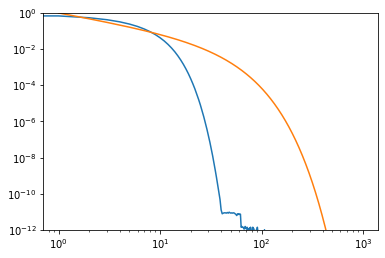

In [21]:
plt.plot(tensor_)
plt.plot(x,x**-1*np.exp(-0.05*x))
plt.xscale('log')
plt.yscale('log')
plt.ylim(1e-12,1e0)
plt.show()